In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536696 sha256=fc131760c28417894b001f0c781f6e9f132356f559da4e5b45dae6fbe8636702
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdsta

In [2]:
import plotly.express as px
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.distributions.empirical_distribution import ECDF
import datetime
import pandas as pd
import numpy as np
df = pd.read_csv('Sales_Product_Price_by_Store.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['weekly_sales'] = df['Price'] * df['Weekly_Units_Sold']
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales
0,1,1,2010-02-05,False,9.99,7.99,245,1957.55
1,1,1,2010-02-12,True,9.99,7.99,453,3619.47
2,1,1,2010-02-19,False,9.99,7.99,409,3267.91
3,1,1,2010-02-26,False,9.99,7.99,191,1526.09
4,1,1,2010-03-05,False,9.99,9.99,145,1448.55


In [3]:
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear
df.head()


<ipython-input-3-438242d04653>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = df.index.weekofyear


,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year
Date,,,,,,,,,,,
2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5
2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6
2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7
2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8
2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9


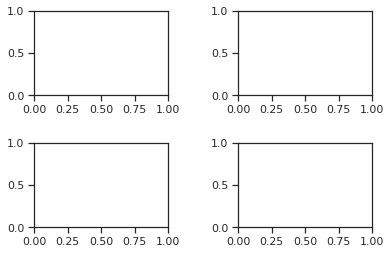

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
c = '#386B7F'
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)

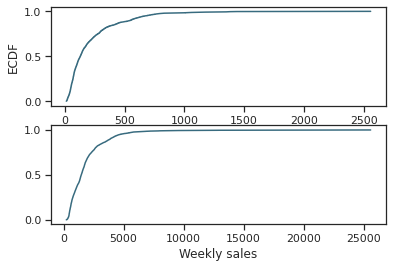

In [9]:
plt.subplot(211)
cdf = ECDF(df['Weekly_Units_Sold'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Units Sold'); plt.ylabel('ECDF');
plt.subplot(212)
cdf = ECDF(df['weekly_sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly sales');

In [10]:
df.groupby('Store')['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,429.0,1789.414172,900.074226,769.65,1208.90,1659.17,1957.20,6816.59
2,429.0,2469.447413,1328.162884,1143.48,1579.21,2215.08,2756.55,9110.00
3,429.0,670.924009,366.816321,229.77,459.77,619.69,730.78,2650.00
4,429.0,3078.462145,1746.147872,1099.45,1818.18,2626.61,3837.51,13753.12
5,429.0,588.922984,242.628977,285.87,461.23,519.74,613.53,2264.97
6,429.0,2066.705082,1163.284768,890.19,1418.58,1758.40,2156.40,7936.03
7,429.0,955.115058,489.084883,389.61,649.35,857.61,1041.51,3270.00
8,429.0,1352.094056,811.326288,516.53,846.23,1275.87,1491.51,6656.67
10,429.0,4093.407249,3130.087191,1483.65,2462.88,3707.81,4510.47,25570.00


In [11]:
df.groupby('Store')['Weekly_Units_Sold'].sum()


Store
1      86699
2     121465
3      31689
4     158718
5      27300
6      97698
7      44027
8      65273
10    200924
Name: Weekly_Units_Sold, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


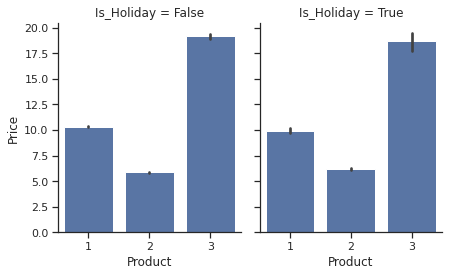

In [12]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price")


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


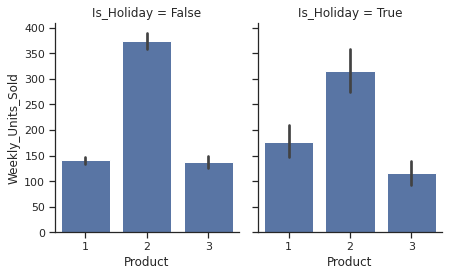

In [13]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Weekly_Units_Sold")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

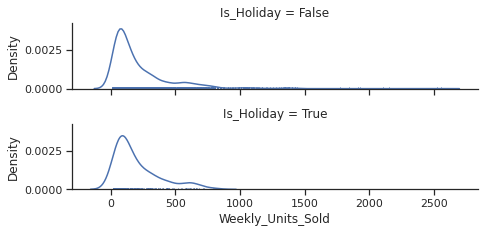

In [17]:
G = sns.FacetGrid(df, row="Is_Holiday",
                  height=1.7, aspect=4,)
G.map(sns.distplot, "Weekly_Units_Sold", hist=False, rug=True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


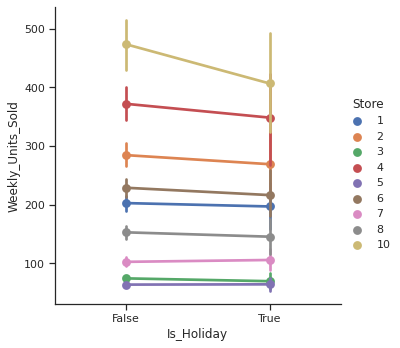

In [16]:
sns.factorplot(data= df,
 x= 'Is_Holiday',
 y= 'Weekly_Units_Sold',
 hue= 'Store')


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


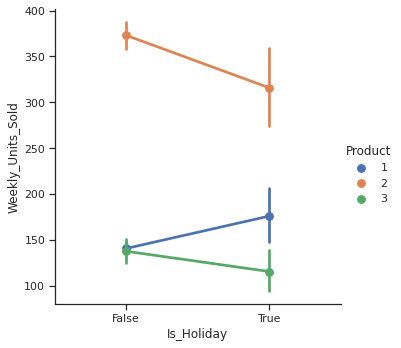

In [18]:
sns.factorplot(data= df,
 x= 'Is_Holiday',
 y= 'Weekly_Units_Sold',
 hue= 'Product')

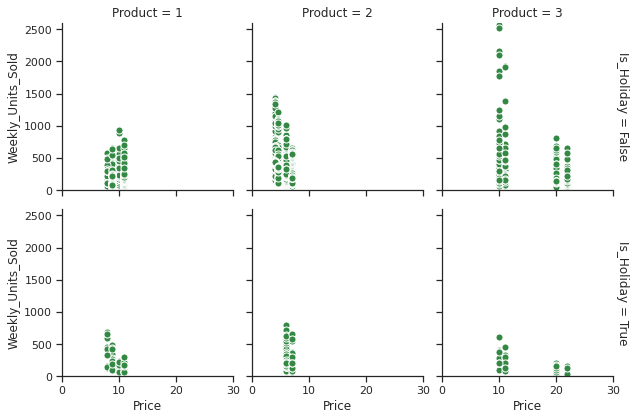

In [20]:
G = sns.FacetGrid(df, col="Product", row="Is_Holiday",
margin_titles=True, height=3)
G.map(plt.scatter, "Price", "Weekly_Units_Sold",
color="#338844", edgecolor="white", s=50, lw=1)
G.set(xlim=(0, 30), ylim=(0, 2600));


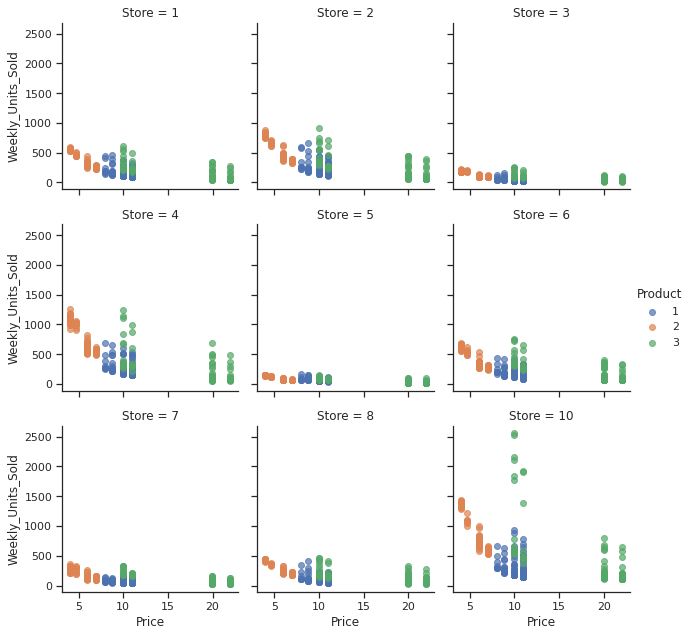

In [25]:

G = sns.FacetGrid(df, col="Store", hue="Product",
margin_titles=True, col_wrap=3)
G.map(plt.scatter, "Price", "Weekly_Units_Sold",alpha=.7)
G.add_legend()

In [35]:
df.groupby(['Product', 'Store'])['Price', 'Weekly_Units_Sold'].mean()


<ipython-input-35-9702f4276615>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Product', 'Store'])['Price', 'Weekly_Units_Sold'].mean()


Price  Weekly_Units_Sold
Product Store                              
1       1      10.296294         149.160839
        2      10.296294         203.839161
        3      10.296294          47.881119
        4      10.296294         242.881119
        5      10.296294          64.104895
        6      10.296294         157.160839
        7      10.296294          62.125874
        8      10.296294          97.895105
        10     10.296294         261.699301
2       1       5.884545         337.594406
        2       5.884545         483.097902
        3       5.884545         122.258741
        4       5.884545         682.566434
        5       5.884545          90.216783
        6       5.884545         369.923077
        7       5.884545         166.118881
        8       5.884545         261.524476
        10      5.884545         807.916084
3       1      19.117413         119.531469
        2      19.117413         162.468531
        3      19.117413          51.461538
        4      19.117413         184.468531
        5      19.117413          36.587413
        6      19.117413         156.118881
        7      19.117413          79.636364
        8      19.117413          97.034965
        10     19.117413         335.447552

<ipython-input-28-cc3e5cfe2f9b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


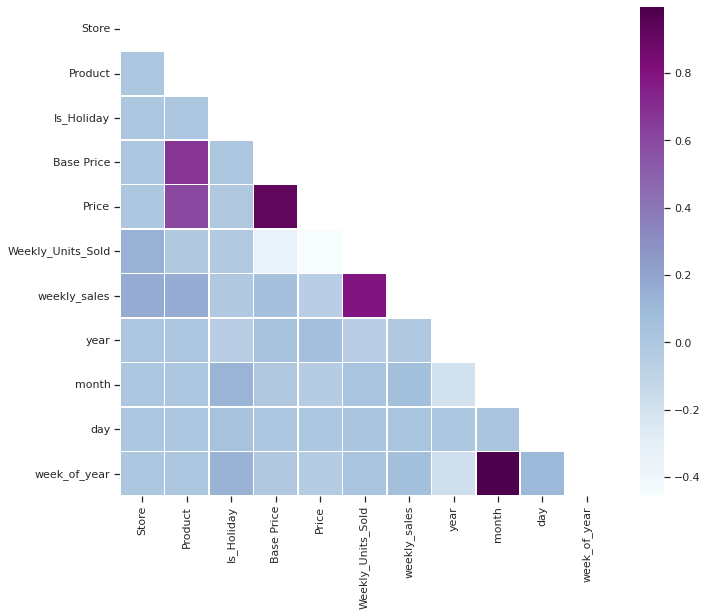

In [28]:
corr_all = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
 square = True, linewidths = .5, ax = ax, cmap =
"BuPu")
plt.show();

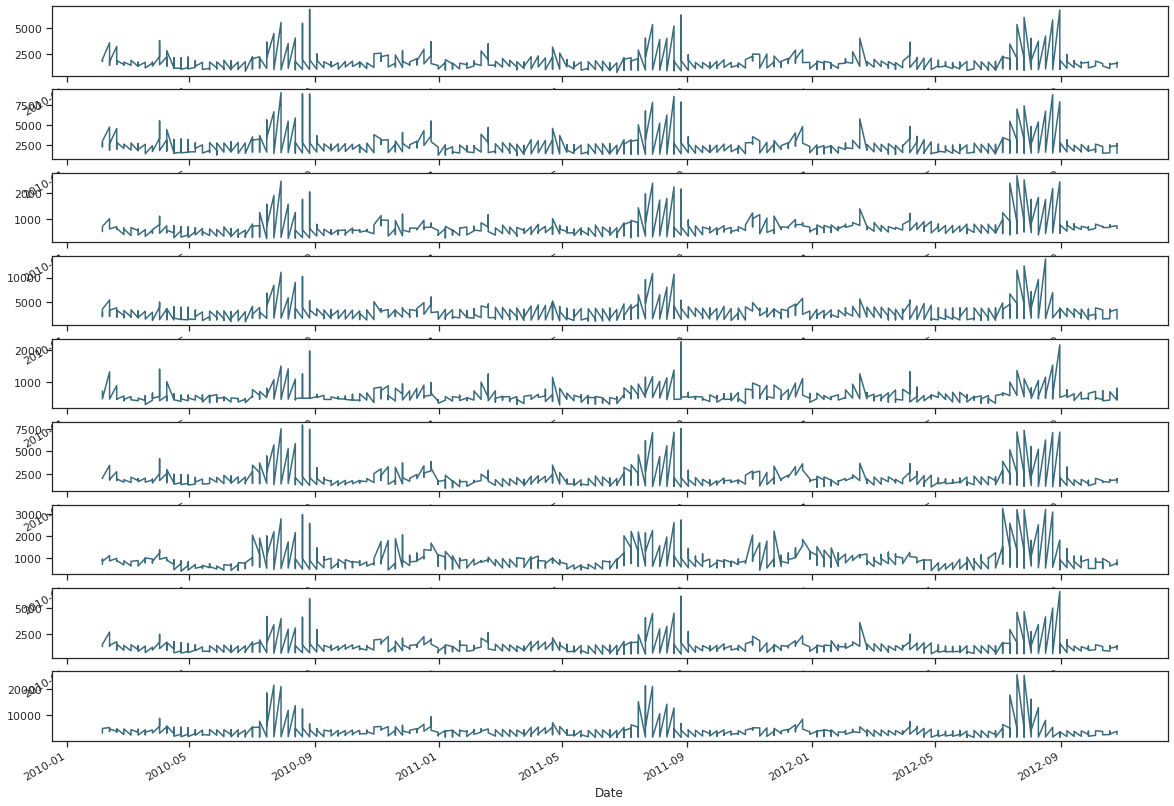

In [31]:
# store types
sales_1 = df[df.Store == 1]['weekly_sales']
sales_2 = df[df.Store == 2]['weekly_sales']
sales_3 = df[df.Store == 3]['weekly_sales']
sales_4 = df[df.Store == 4]['weekly_sales']
sales_5 = df[df.Store == 5]['weekly_sales']
sales_6 = df[df.Store == 6]['weekly_sales']
sales_7 = df[df.Store == 7]['weekly_sales']
sales_8 = df[df.Store == 8]['weekly_sales']
sales_10 = df[df.Store == 10]['weekly_sales']
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, figsize = (20, 15))
# store types
sales_1.plot(color = c, ax = ax1)
sales_2.plot(color = c, ax = ax2)
sales_3.plot(color = c, ax = ax3)
sales_4.plot(color = c, ax = ax4)
sales_5.plot(color = c, ax = ax5)
sales_6.plot(color = c, ax = ax6)
sales_7.plot(color = c, ax = ax7)
sales_8.plot(color = c, ax = ax8)
sales_10.plot(color = c, ax = ax9)

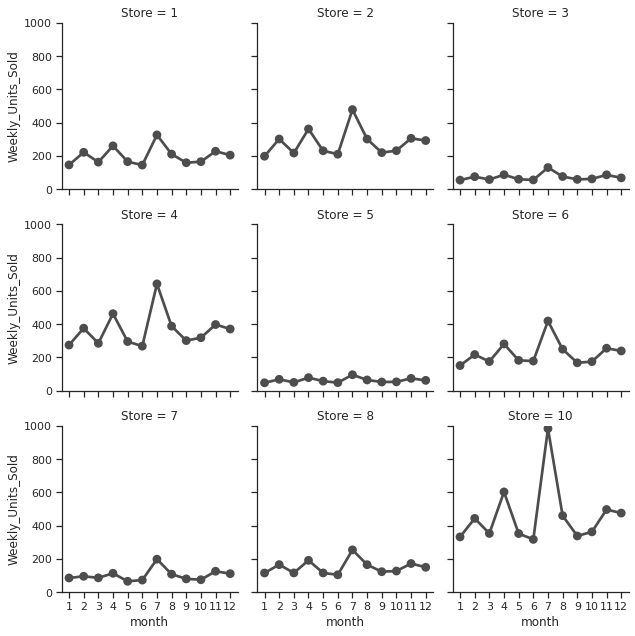

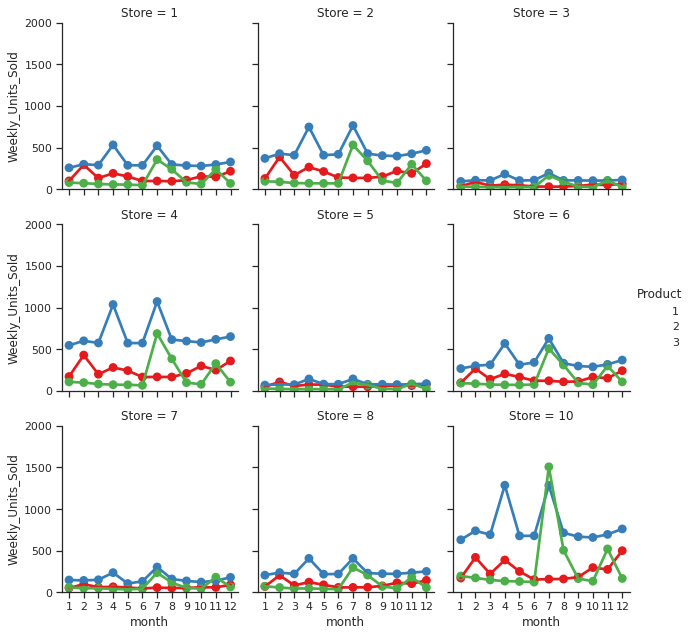

In [38]:
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

 

g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 2000), hue='Product', palette="Set1")
g.map(sns.pointplot, "month", "Weekly_Units_Sold", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12], alpha=.7)
g.add_legend();

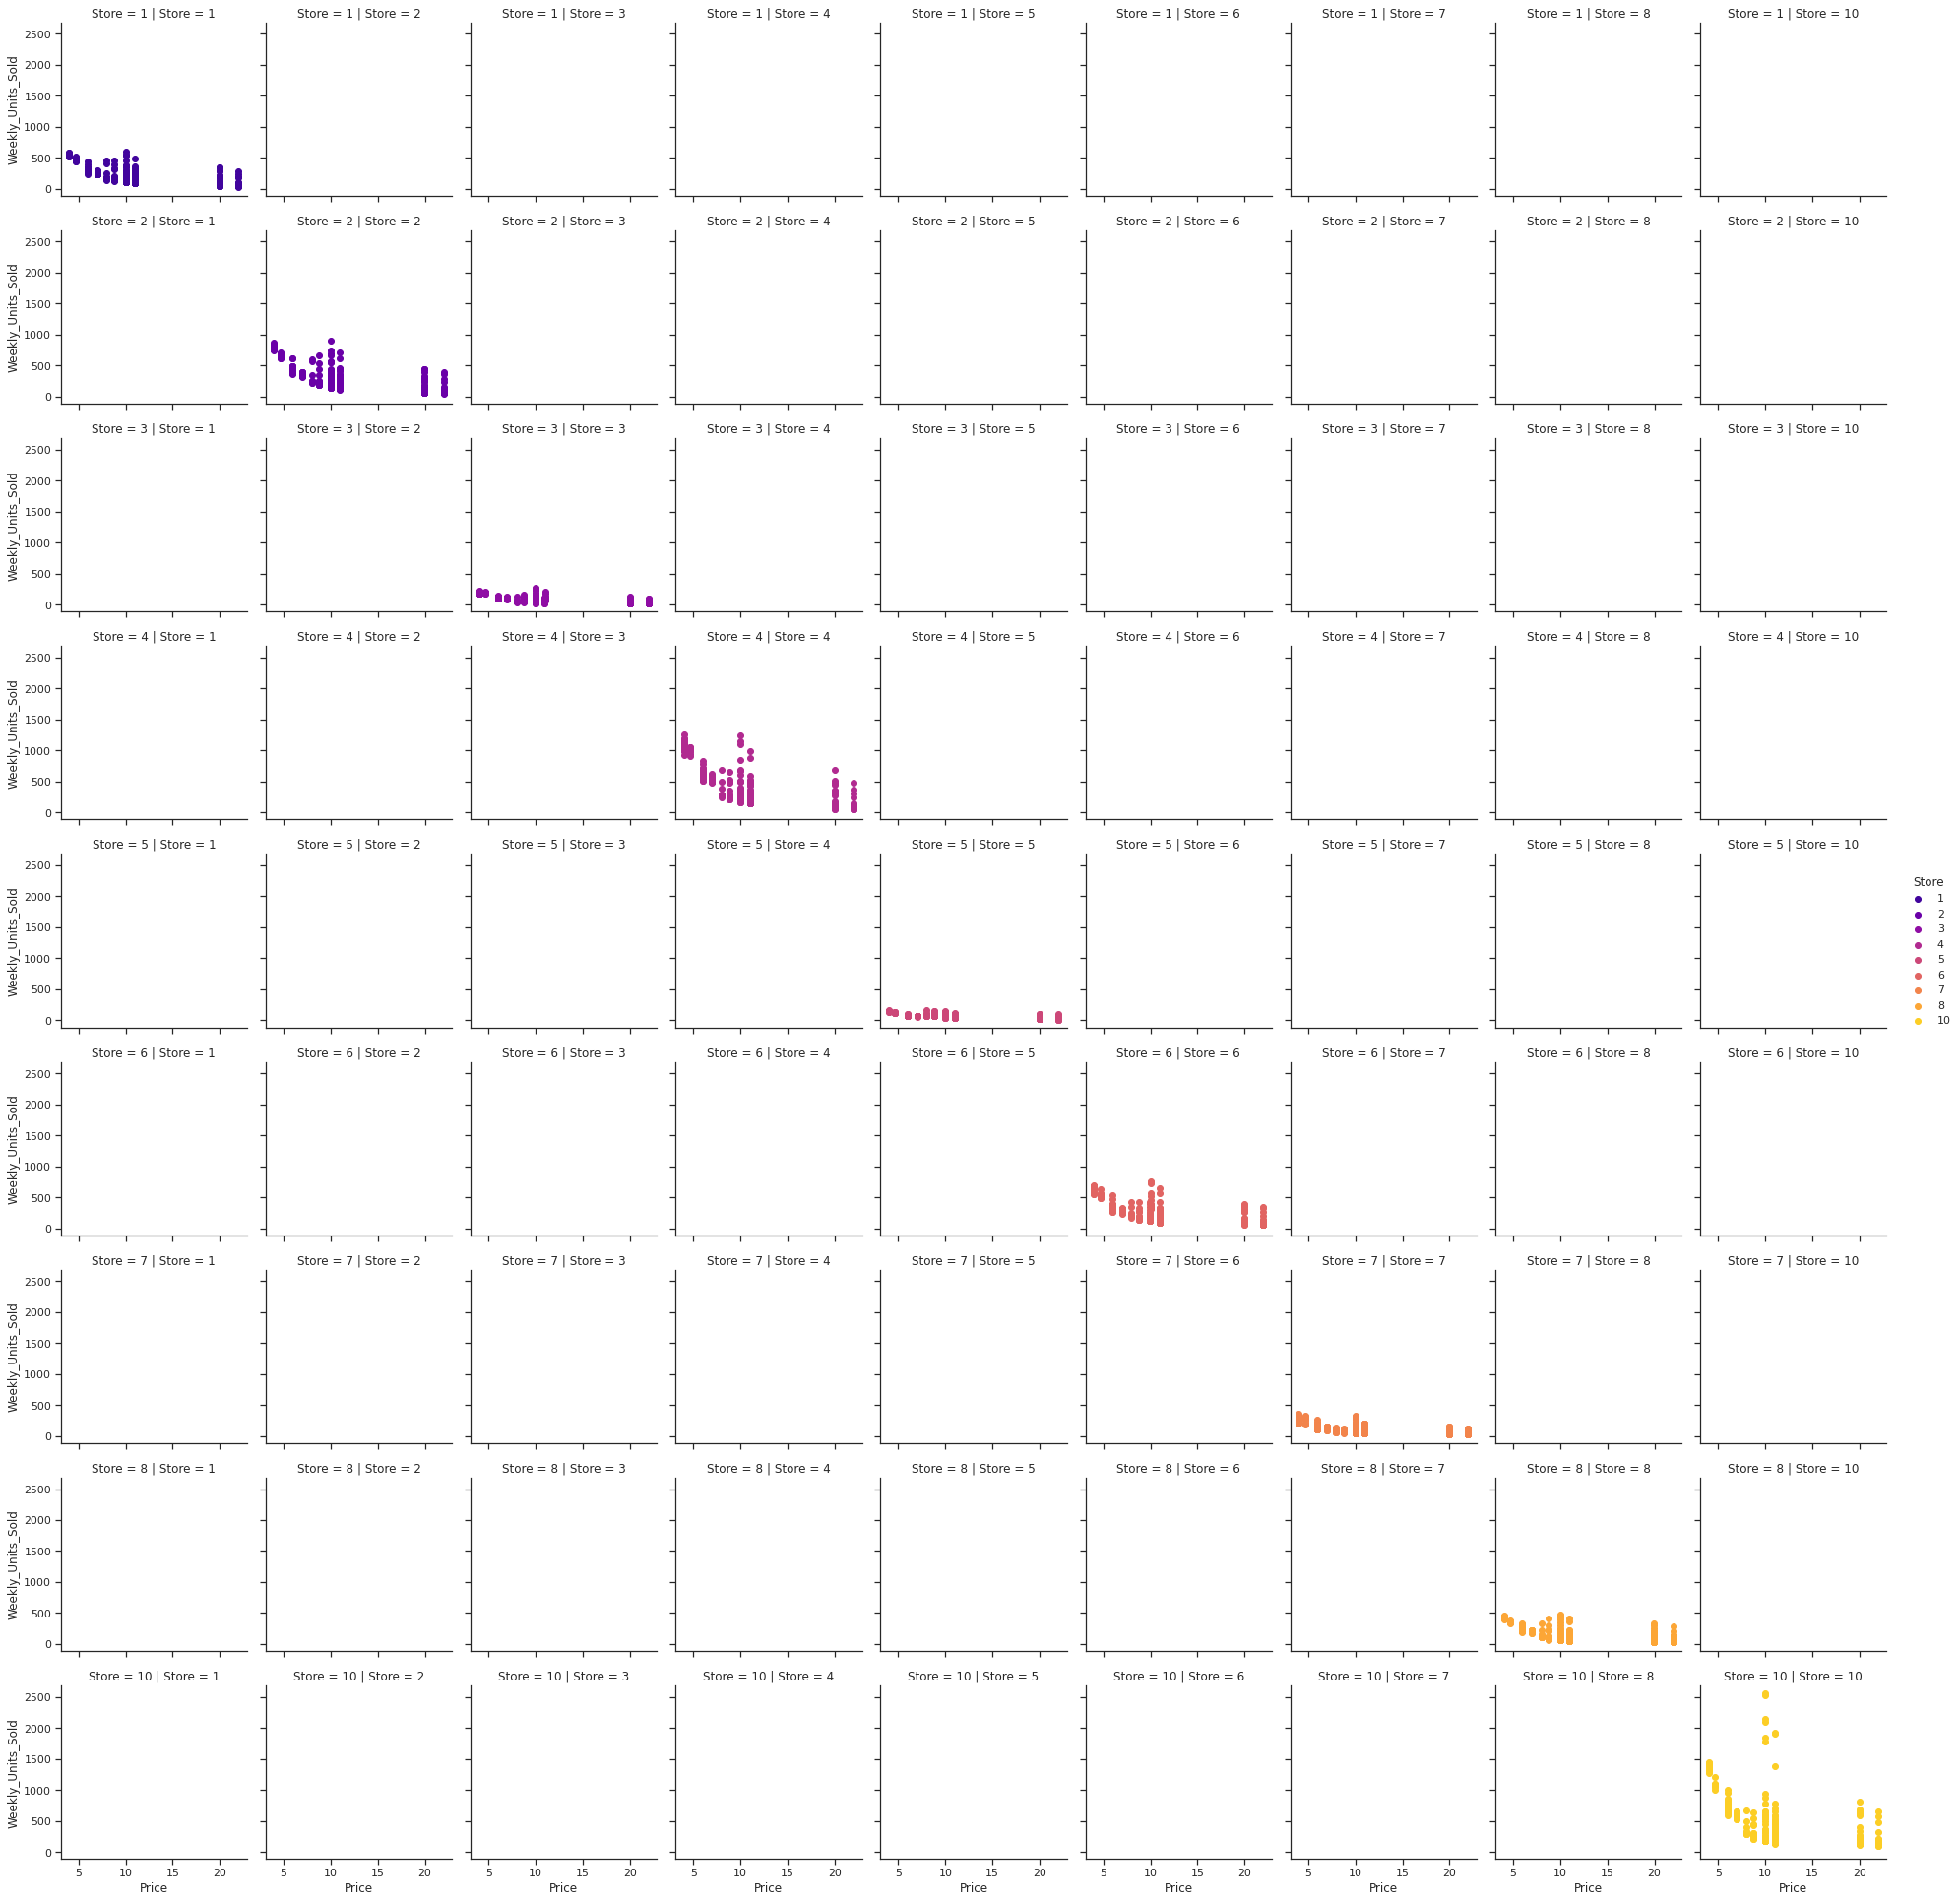

In [39]:
g = sns.FacetGrid(df, col="Store", hue="Store", palette = 'plasma', row='Store')
g = (g.map(plt.scatter, "Price", "Weekly_Units_Sold").add_legend())

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


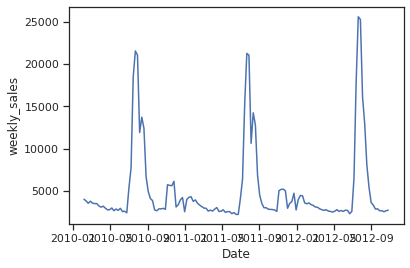

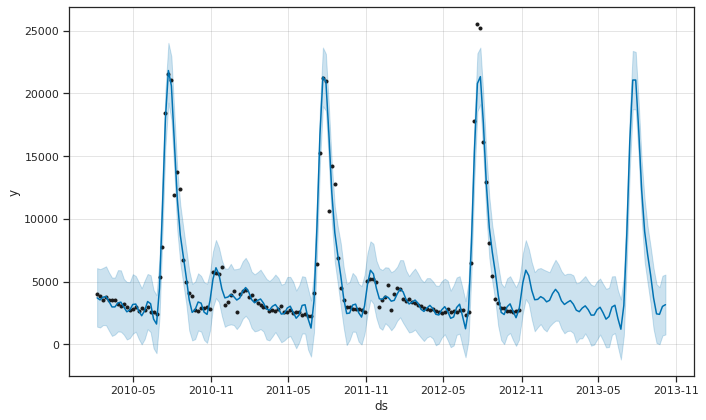

In [40]:
store_10_pro_3 = df[(df.Store == 10) & (df.Product == 3)].loc[:, ['Base Price', 'Price', 'Weekly_Units_Sold', 'weekly_sales']]
store_10_pro_3.reset_index(level=0, inplace=True)
ax = sns.lineplot(x="Date", y="weekly_sales", data=store_10_pro_3)

 

store_10_pro_3 = store_10_pro_3[['Date', 'weekly_sales']].rename(columns = {'Date': 'ds','weekly_sales': 'y'})
 
model = Prophet(interval_width = 0.95)
model.fit(store_10_pro_3) 
future_dates = model.make_future_dataframe(periods = 50, freq='W')
forecast = model.predict(future_dates)
model.plot(forecast);

In [41]:
model = Prophet(interval_width = 0.95)
model.fit(store_10_pro_3)
 
future_dates = model.make_future_dataframe(periods = 50, freq='W')

future_dates.tail(7)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
186,2013-08-25
187,2013-09-01
188,2013-09-08
189,2013-09-15
190,2013-09-22
191,2013-09-29
192,2013-10-06


In [42]:
forecast = model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
186,2013-08-25,7161.642269,4916.848846,9547.248490
187,2013-09-01,5543.699970,3247.863085,7653.702499
188,2013-09-08,3703.519113,1472.703527,5969.519988
189,2013-09-15,2428.680675,69.398029,4771.285565
190,2013-09-22,2388.367614,30.205658,4602.870582
191,2013-09-29,3021.829122,626.306850,5538.314778
192,2013-10-06,3159.058286,888.425050,5514.479483


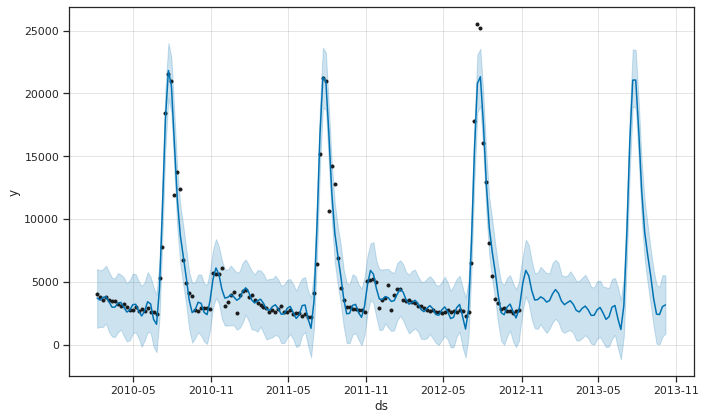

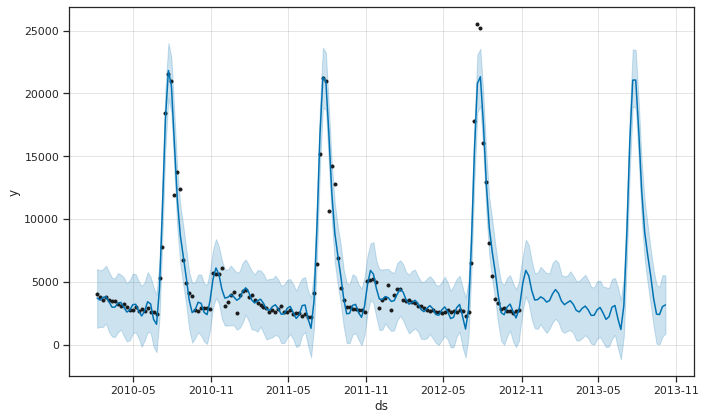

In [43]:
model.plot(forecast)


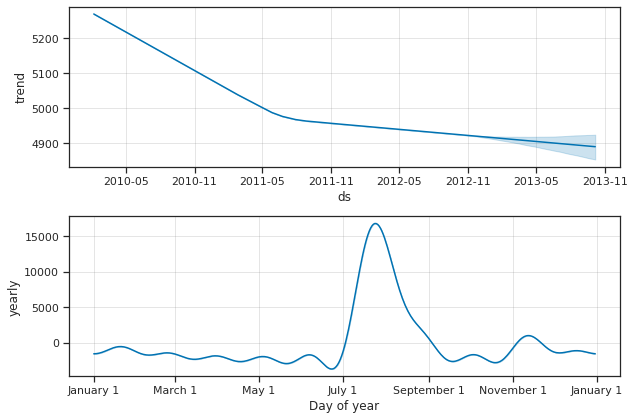

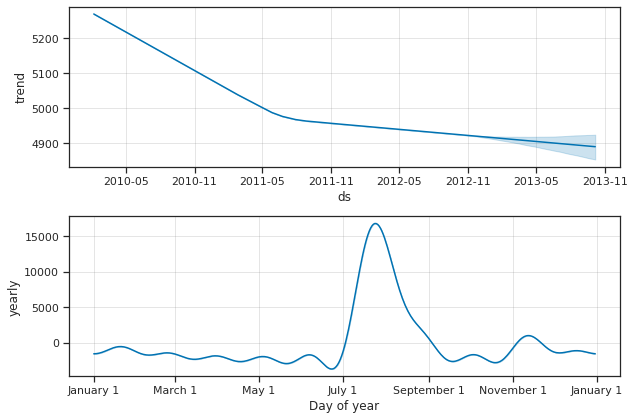

In [44]:
model.plot_components(forecast)


In [45]:
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1190.0953881068017


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 720x360 with 0 Axes>

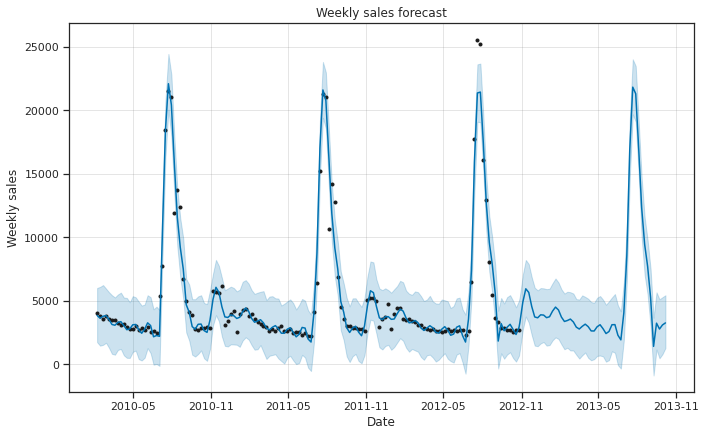

In [46]:
def is_school_holiday_season(ds):    
    date = pd.to_datetime(ds)
    starts = datetime.date(date.year, 7, 1)
    ends = datetime.date(date.year, 9, 9)
    return starts < date.to_pydatetime().date() < ends

store_10_pro_3['school_holiday_season'] = store_10_pro_3['ds'].apply(is_school_holiday_season)
store_10_pro_3['not_school_holiday_season'] = ~store_10_pro_3['ds'].apply(is_school_holiday_season)
model = Prophet(interval_width=0.95)

model.add_seasonality(name='school_holiday_season', period=365, fourier_order=3, condition_name='school_holiday_season')
model.add_seasonality(name='not_school_holiday_season', period=365, fourier_order=3, condition_name='not_school_holiday_season')
model.fit(store_10_pro_3)

forecast = model.make_future_dataframe(periods=50, freq='W')
forecast['school_holiday_season'] = forecast['ds'].apply(is_school_holiday_season)
forecast['not_school_holiday_season'] = ~forecast['ds'].apply(is_school_holiday_season)
forecast = model.predict(forecast)

plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'Weekly sales')
plt.title('Weekly sales forecast');

In [47]:
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1126.1657919566567
